# ANSCOMBE'S QUARTET


In [182]:
# Import required packages:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


In [192]:
def build_sample_data():
    """Builds the dataset from Anscombe paper.
    Reference: F. J. "Graphs in Statistical Analysis."
    The American Statistician 27,
    no. 1 (1973): 17-21.
    Return: Pandas dataframe
    """    
    x = [10,8,13,9,11,14,6,4,12,7,5]
    x4 = [8,8,8,8,8,8,8,19,8,8,8]
    
    y1 = [8,7,7.6,8.8,8.3,10,7.2,4.3,10.8,4.8,5.8]
    y2 = [9.1,8.1,8.7,8.8,9.3,8.1,6.1,3.1,9.1,7.3,4.7]
    y3 = [7.5,6.8,12.7,7.1,7.8,8.8,6.1,5.4,8.2,6.4,5.7]
    y4 = [6.6,5.8,7.7,8.8,8.5,7,5.3,12.5,5.6,7.9,6.9]
    d1 = {'x1':x, 'y1':y1, 'x2':x, 'y2':y2, 'x3':x, 'y3':y3, 'x4':x4, 'y4':y4 }

    return pd.DataFrame(data=d1)

def show_regr_with_matplotlib(X,Y, xseq, a, b, title, pos):
    """ Shows the linear regression using matplotlib
    """
    ax = plt.subplot(2, 2, pos)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(X, Y,  s=60, alpha=0.7, edgecolors="k")
    plt.plot(xseq, a + b * xseq, color="k", lw=1.5)


def computeLinearRegression(df,col1,col2, title, pos):
    """Fit linear regression via least squares with numpy.polyfit
        b: regression coefficient
        a: intercept
    """   

    X = df.loc[:, col1].values
    Y = df.loc[:, col2].values
    #Fit linear regression
    b, a = np.polyfit(X,Y, deg=1)

    xseq = np.linspace(0, 21, num=100)
    
    print("{} -> Equation of regression line: y = {:.0f} + {:.1f} x".format(title,a, b) )
    
    # Plot Figures:
    show_regr_with_matplotlib(X,Y,xseq,a,b, title, pos)

 

In [193]:
df1 = build_sample_data()
df1.head(11)

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.0,10,9.1,10,7.5,8,6.6
1,8,7.0,8,8.1,8,6.8,8,5.8
2,13,7.6,13,8.7,13,12.7,8,7.7
3,9,8.8,9,8.8,9,7.1,8,8.8
4,11,8.3,11,9.3,11,7.8,8,8.5
5,14,10.0,14,8.1,14,8.8,8,7.0
6,6,7.2,6,6.1,6,6.1,8,5.3
7,4,4.3,4,3.1,4,5.4,19,12.5
8,12,10.8,12,9.1,12,8.2,8,5.6
9,7,4.8,7,7.3,7,6.4,8,7.9


In [194]:
df1.agg(["mean",  "var"])

,x1,y1,x2,y2,x3,y3,x4,y4
mean,9.0,7.509091,9.0,7.490909,9.0,7.500,9.0,7.509091
var,11.0,4.048909,11.0,4.140909,11.0,4.078,11.0,4.064909


In [195]:
correlation = df1.corr()


print("Correlation[x1,y1]= {:.2f}".format(correlation.loc['x1', 'y1']))
print("Correlation[x2,y2]= {:.2f}".format(correlation.loc['x2', 'y2']))
print("Correlation[x3,y3]= {:.2f}".format(correlation.loc['x3', 'y3']))
print("Correlation[x3,y3]= {:.2f}".format(correlation.loc['x4', 'y4']))



Correlation[x1,y1]= 0.82
Correlation[x2,y2]= 0.81
Correlation[x3,y3]= 0.82
Correlation[x3,y3]= 0.82


Data set 1 -> Equation of regression line: y = 3 + 0.5 x
Data set 2 -> Equation of regression line: y = 3 + 0.5 x
Data set 3 -> Equation of regression line: y = 3 + 0.5 x
Data set 4 -> Equation of regression line: y = 3 + 0.5 x


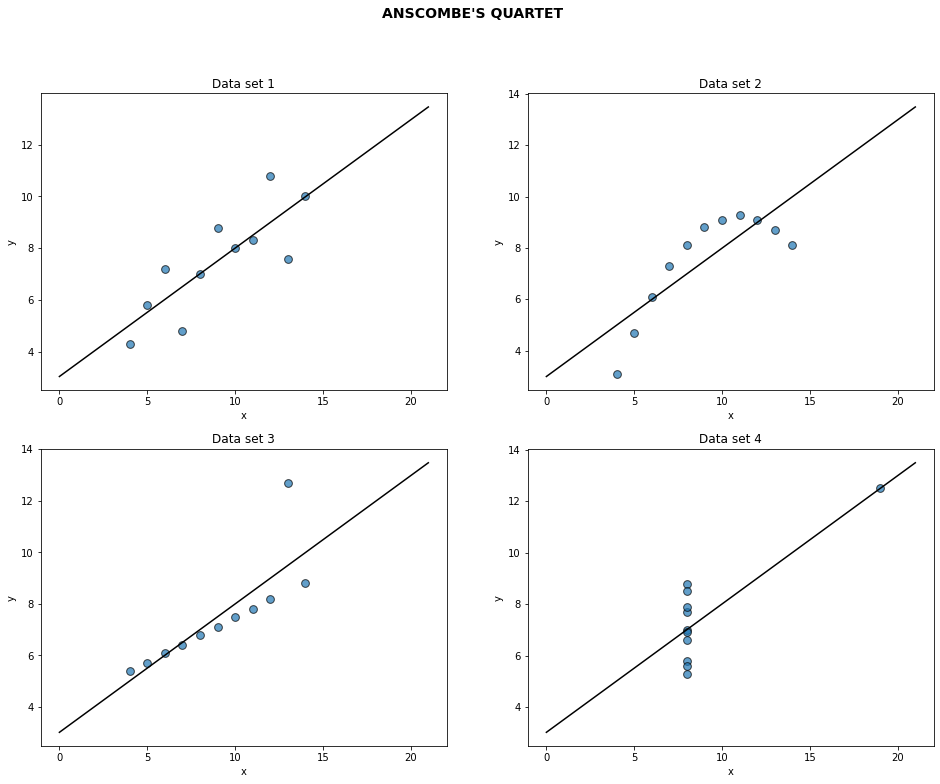

In [200]:
# Create the dimensions of the figure and set title:
# Set the width and height of the figure
plt.figure(figsize=(16, 12))
plt.suptitle("ANSCOMBE'S QUARTET", fontsize=14, fontweight='bold')

computeLinearRegression(df1,"x1","y1", "Data set 1",1)
computeLinearRegression(df1,"x1","y2", "Data set 2",2)
computeLinearRegression(df1,"x1","y3", "Data set 3",3)
computeLinearRegression(df1,"x4","y4", "Data set 4",4)
plt.savefig("L1_Anscombe.png")
plt.show()